# FAANG's Stock Market Performance
By Alvaro Rodriguez

## Business Understanding

## Data Understanding

## Data Preparation

Stock market performance analysis includes calulating close stock prices, moving averages, and measuring volatility

### Collect Real-Time Stock Market Data
Using the yfinance API, the data can be collected straight from Yahoo finance.

In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [2]:
# Start date of the stock price 12 months ago to current date
start_date = datetime.now() - pd.DateOffset(months=12)
end_date = datetime.now()

In [3]:
# Download the historical stock price data for FAANG for the last year
tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                         Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-05-23  195.190002  196.990005  191.240005  196.229996  196.229996  \
       2022-05-24  180.550003  183.679993  176.110001  181.279999  181.279999   
       2022-05-25  180.399994  185.449997  179.320007  183.830002  183.830002   
       2022-05-26  182.880005  192.830002  182.259995  191.630005  191.630005   
       2022-05-27  191.360001  195.330002  189.800003  195.130005  195.130005   

                     Volume  
Ticker Date                  
META   2022-05-23  25059200

### Dataframe Information

In [4]:
df

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-05-23  195.190002  196.990005  191.240005  196.229996  196.229996  \
       2022-05-24  180.550003  183.679993  176.110001  181.279999  181.279999   
       2022-05-25  180.399994  185.449997  179.320007  183.830002  183.830002   
       2022-05-26  182.880005  192.830002  182.259995  191.630005  191.630005   
       2022-05-27  191.360001  195.330002  189.800003  195.130005  195.130005   
...                       ...         ...         ...         ...         ...   
GOOG   2023-05-15  116.489998  118.794998  116.480003  116.959999  116.959999   
       2023-05-16  116.830002  121.199997  116.830002  120.089996  120.089996   
       2023-05-17  120.180000  122.279999  119.459999  121.480003  121.480003   
       2023-05-18  121.559998  123.900002  121.489998  123.519997  123.519997   
       2023-05-19  124.199997  126.478996  122.720001  123.250000  123.250000   

                     Volume  
Ticker Date                  
META   2022-05-23  25059200  
       2022-05-24  50406300  
       2022-05-25  28030200  
       2022-05-26  23056500  
       2022-05-27  22562700  
...                     ...  
GOOG   2023-05-15  22107900  
       2023-05-16  32370100  
       2023-05-17  26659600  
       2023-05-18  27014500  
       2023-05-19  30251300  

[1251 rows x 6 columns]

In [5]:
df.head()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-05-23  195.190002  196.990005  191.240005  196.229996  196.229996  \
       2022-05-24  180.550003  183.679993  176.110001  181.279999  181.279999   
       2022-05-25  180.399994  185.449997  179.320007  183.830002  183.830002   
       2022-05-26  182.880005  192.830002  182.259995  191.630005  191.630005   
       2022-05-27  191.360001  195.330002  189.800003  195.130005  195.130005   

                     Volume  
Ticker Date                  
META   2022-05-23  25059200  
       2022-05-24  50406300  
       2022-05-25  28030200  
       2022-05-26  23056500  
       2022-05-27  22562700

In [6]:
df.tail()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
GOOG   2023-05-15  116.489998  118.794998  116.480003  116.959999  116.959999  \
       2023-05-16  116.830002  121.199997  116.830002  120.089996  120.089996   
       2023-05-17  120.180000  122.279999  119.459999  121.480003  121.480003   
       2023-05-18  121.559998  123.900002  121.489998  123.519997  123.519997   
       2023-05-19  124.199997  126.478996  122.720001  123.250000  123.250000   

                     Volume  
Ticker Date                  
GOOG   2023-05-15  22107900  
       2023-05-16  32370100  
       2023-05-17  26659600  
       2023-05-18  27014500  
       2023-05-19  30251300

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1251 entries, ('META', Timestamp('2022-05-23 00:00:00')) to ('GOOG', Timestamp('2023-05-19 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1251 non-null   float64
 1   High       1251 non-null   float64
 2   Low        1251 non-null   float64
 3   Close      1251 non-null   float64
 4   Adj Close  1251 non-null   float64
 5   Volume     1251 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 72.7+ KB


In [8]:
df.describe()

Open         High          Low        Close    Adj Close   
count  1251.000000  1251.000000  1251.000000  1251.000000  1251.000000  \
mean    159.925377   162.743531   157.575112   160.288874   160.184888   
std      69.934515    71.274386    68.786667    70.135149    70.151054   
min      82.800003    83.480003    81.430000    81.820000    81.820000   
25%     107.410000   109.105000   105.610001   107.689999   107.689999   
50%     140.889999   143.100006   138.660004   141.110001   140.719727   
75%     179.495003   183.639999   176.239998   180.029999   180.029999   
max     372.410004   379.429993   364.540009   371.290009   371.290009   

             Volume  
count  1.251000e+03  
mean   4.311526e+07  
std    3.190336e+07  
min    2.657900e+06  
25%    1.944325e+07  
50%    3.328780e+07  
75%    6.453105e+07  
max    2.323166e+08

In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
df.index

MultiIndex([('META', '2022-05-23'),
            ('META', '2022-05-24'),
            ('META', '2022-05-25'),
            ('META', '2022-05-26'),
            ('META', '2022-05-27'),
            ('META', '2022-05-31'),
            ('META', '2022-06-01'),
            ('META', '2022-06-02'),
            ('META', '2022-06-03'),
            ('META', '2022-06-06'),
            ...
            ('GOOG', '2023-05-08'),
            ('GOOG', '2023-05-09'),
            ('GOOG', '2023-05-10'),
            ('GOOG', '2023-05-11'),
            ('GOOG', '2023-05-12'),
            ('GOOG', '2023-05-15'),
            ('GOOG', '2023-05-16'),
            ('GOOG', '2023-05-17'),
            ('GOOG', '2023-05-18'),
            ('GOOG', '2023-05-19')],
           names=['Ticker', 'Date'], length=1251)

In [11]:
df.shape

(1251, 6)

In [12]:
# Date column is in the index column in the DataFrame
df = df.reset_index()
df

Ticker       Date        Open        High         Low       Close   
0      META 2022-05-23  195.190002  196.990005  191.240005  196.229996  \
1      META 2022-05-24  180.550003  183.679993  176.110001  181.279999   
2      META 2022-05-25  180.399994  185.449997  179.320007  183.830002   
3      META 2022-05-26  182.880005  192.830002  182.259995  191.630005   
4      META 2022-05-27  191.360001  195.330002  189.800003  195.130005   
...     ...        ...         ...         ...         ...         ...   
1246   GOOG 2023-05-15  116.489998  118.794998  116.480003  116.959999   
1247   GOOG 2023-05-16  116.830002  121.199997  116.830002  120.089996   
1248   GOOG 2023-05-17  120.180000  122.279999  119.459999  121.480003   
1249   GOOG 2023-05-18  121.559998  123.900002  121.489998  123.519997   
1250   GOOG 2023-05-19  124.199997  126.478996  122.720001  123.250000   

       Adj Close    Volume  
0     196.229996  25059200  
1     181.279999  50406300  
2     183.830002  28030200  
3     191.630005  23056500  
4     195.130005  22562700  
...          ...       ...  
1246  116.959999  22107900  
1247  120.089996  32370100  
1248  121.480003  26659600  
1249  123.519997  27014500  
1250  123.250000  30251300  

[1251 rows x 8 columns]

### Plot Stock Market Performance

In [13]:
# Performance in the Stock Market of all the companies
import plotly.express as px
fig = px.line(df, x='Date',
             y='Close',
             color='Ticker',
             title="Stock Market Performance of FANNG for the Last Year")
fig.show();

In [14]:
# Faceted area chart of the companies to compare the performance of different companies
fig = px.area(df, x='Date', y='Close', color='Ticker',
             facet_col='Ticker',
             labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
             title='Stock Prices for FAANG')

fig.show();

### Analyze Moving Averages

In [15]:
# Analyze moving averages; provides a useful way to identify trends and patterns in each company's stock price movements over the year

df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
           MA10        MA20
250         NaN         NaN
251         NaN         NaN
252         NaN         NaN
253         NaN         NaN
254         NaN         NaN
..          ...         ...
495  171.257001  168.944000
496  171.610002  169.224001
497  172.134003  169.477000
498  173.060004  169.897001
499  173.219003  170.404001

[250 rows x 2 columns]
Moving Averages for AMZN
           MA10        MA20
500         NaN         NaN
501         NaN         NaN
502         NaN         NaN
503         NaN         NaN
504         NaN         NaN
..          ...         ...
745  107.322001  106.083501
746  108.299001  106.638501
747  109.484001  107.198500
748  110.899001  107.915501
749  111.958001  108.380001

[250 rows x 2 columns]
Moving Averages for GOOG
            MA10       MA20
1001         NaN        NaN
1002         NaN        NaN
1003         NaN        NaN
1004         NaN        NaN
1005         NaN        NaN
...          ...        ...
1246  110

In [16]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20'], 
                  title=f"{ticker} Moving Averages")
    fig.show()

The output shows four separate graphs for each company in FAANG. When the MA10 crosses above the MA20, it is considered a bullish signal.
When the MA10 rosses below the MA20, it is considered a bearish signal.

### Analyze Volatility of Each Company in FAANG

In [17]:
# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility', 
              color='Ticker', 
              title='Volatility of All Companies')
fig.show()

Volatility is the measure of how much and how often the stock price fluctuates over a given period of time. High volatility indicates that the stock experiences large and frequent price movements, while low volatility indicates that the market experiences smaller price movements.

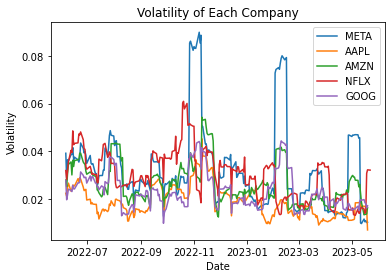

In [18]:
import matplotlib.pyplot as plt

# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Iterate over each company
for ticker in df['Ticker'].unique():
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()  # Convert to NumPy array
    dates = company_df['Date'].to_numpy()  # Convert 'Date' column to NumPy array
    plt.plot(dates, volatility_values, label=ticker)

plt.title('Volatility of Each Company')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show();

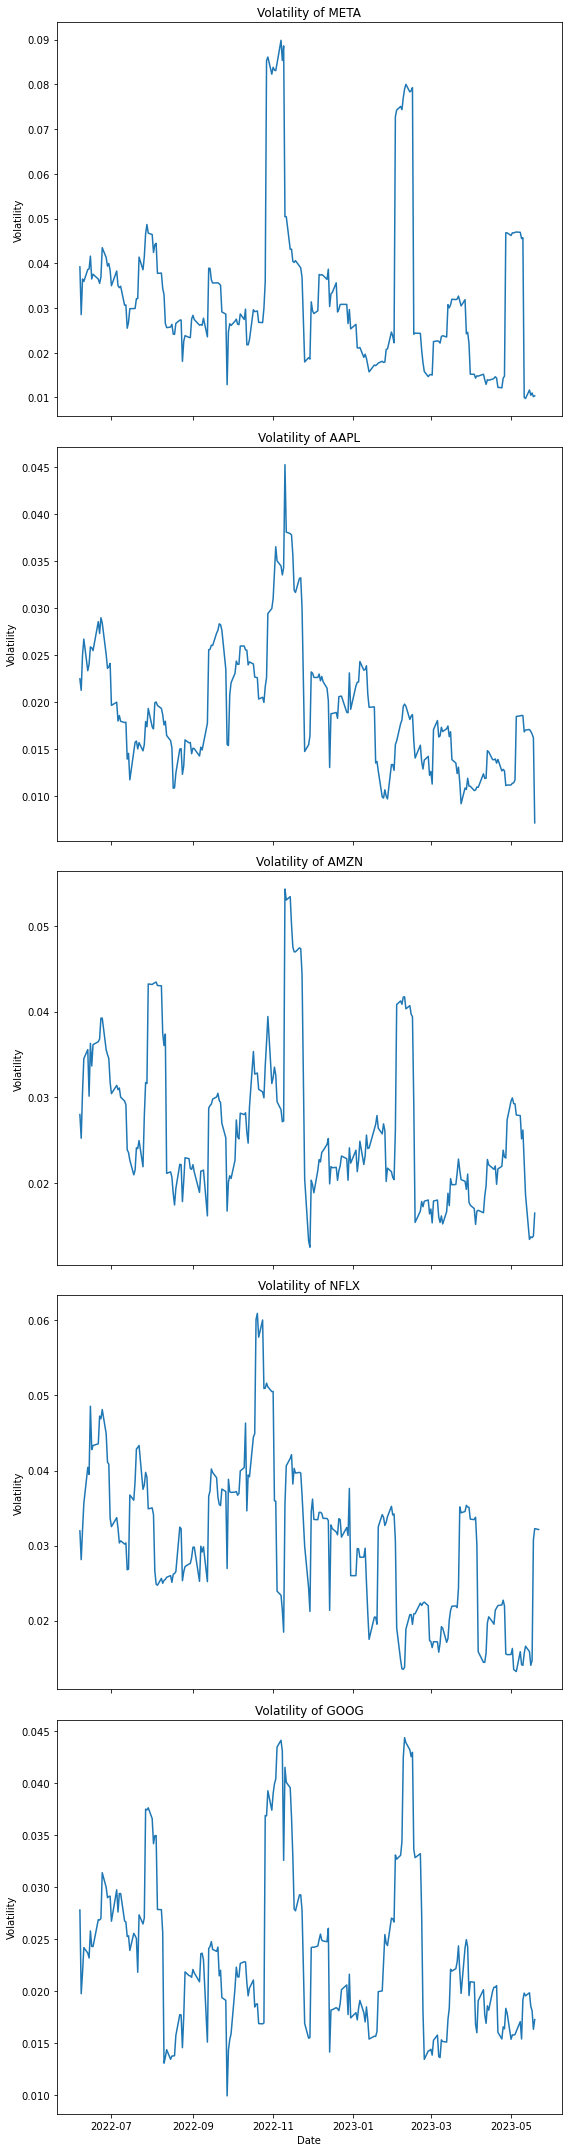

In [19]:
# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Get unique tickers
tickers = df['Ticker'].unique()

# Determine the number of subplots based on the number of tickers
num_subplots = len(tickers)

# Create subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 6*num_subplots), sharex=True)

# Iterate over each ticker and plot
for i, ticker in enumerate(tickers):
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()
    dates = company_df['Date'].to_numpy()
    
    # Select the appropriate subplot
    ax = axs[i] if num_subplots > 1 else axs
    
    # Plot the data
    ax.plot(dates, volatility_values)
    ax.set_title(f'Volatility of {ticker}')
    ax.set_ylabel('Volatility')

# Set the common x-axis label
axs[-1].set_xlabel('Date')

plt.tight_layout()
plt.show();

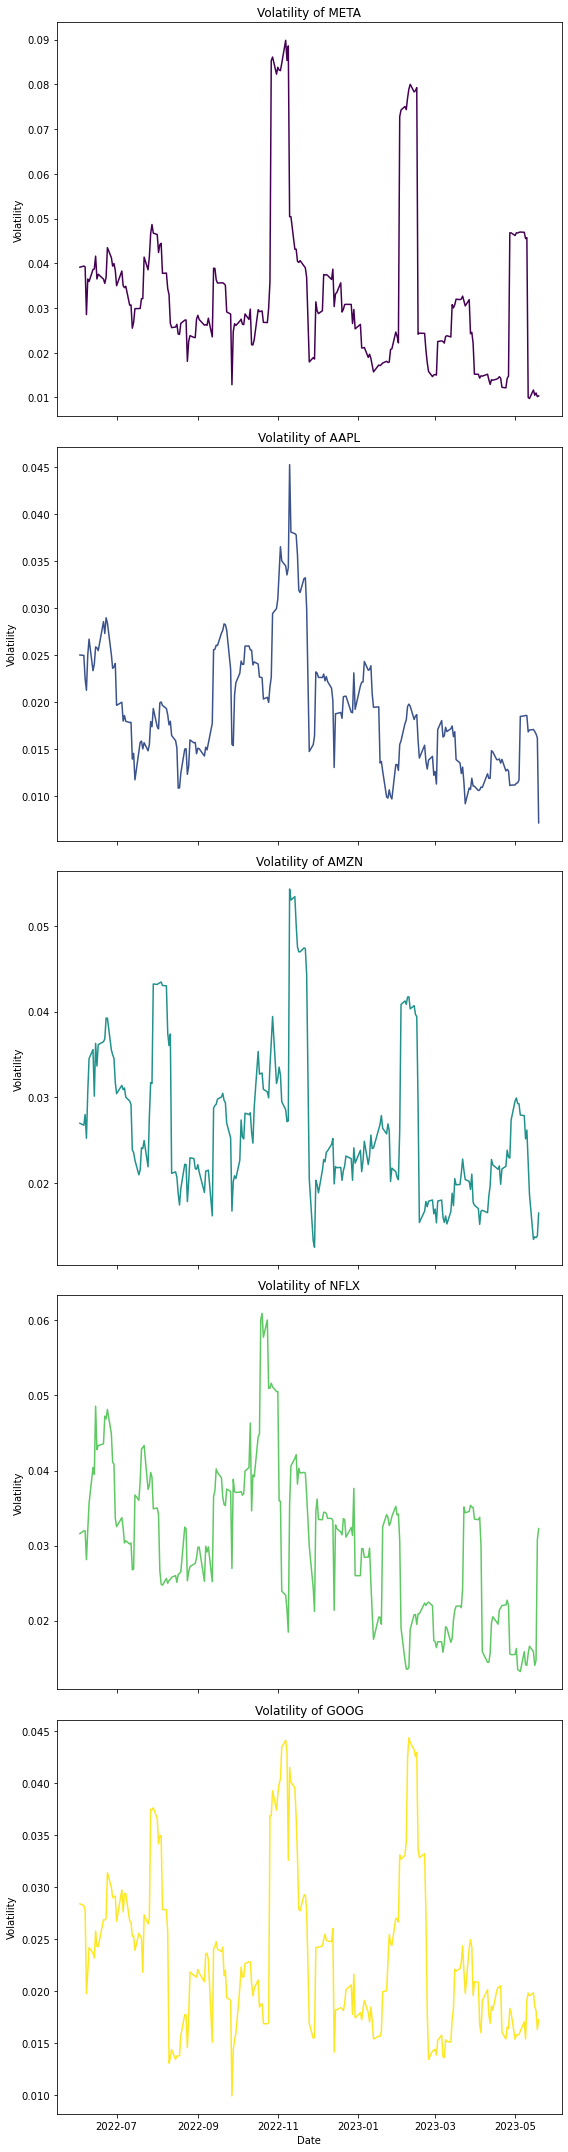

In [20]:
import numpy as np

# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Get unique tickers
tickers = df['Ticker'].unique()

# Determine the number of subplots based on the number of tickers
num_subplots = len(tickers)

# Create a colormap using the 'viridis' color map
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, num_subplots))

# Create subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 6*num_subplots), sharex=True)

# Iterate over each ticker and plot
for i, ticker in enumerate(tickers):
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()
    dates = company_df['Date'].to_numpy()
    
    # Select the appropriate subplot
    ax = axs[i] if num_subplots > 1 else axs
    
    # Plot the data with the corresponding color
    ax.plot(dates, volatility_values, color=colors[i])
    ax.set_title(f'Volatility of {ticker}')
    ax.set_ylabel('Volatility')

# Set the common x-axis label
axs[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

## Simple Model

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticker      1251 non-null   object        
 1   Date        1251 non-null   datetime64[ns]
 2   Open        1251 non-null   float64       
 3   High        1251 non-null   float64       
 4   Low         1251 non-null   float64       
 5   Close       1251 non-null   float64       
 6   Adj Close   1251 non-null   float64       
 7   Volume      1251 non-null   int64         
 8   MA10        1206 non-null   float64       
 9   MA20        1156 non-null   float64       
 10  Volatility  1201 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 107.6+ KB


In [21]:
df.set_index('Date', inplace=True)

In [22]:
fig = px.line(df, x=df.index, y='Close', color='Ticker', title='Stock Prices Over Time')
fig.show();

### Time-Series Line Plot

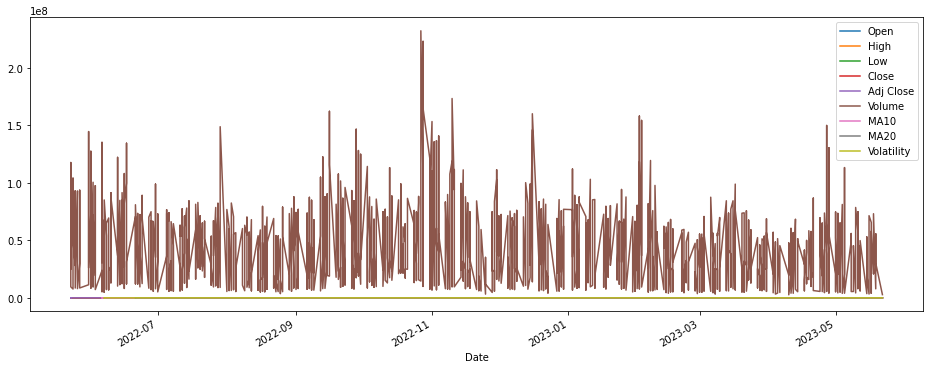

In [23]:
# Draw a line plot using df and .plot() method 
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(figsize = (16,6));

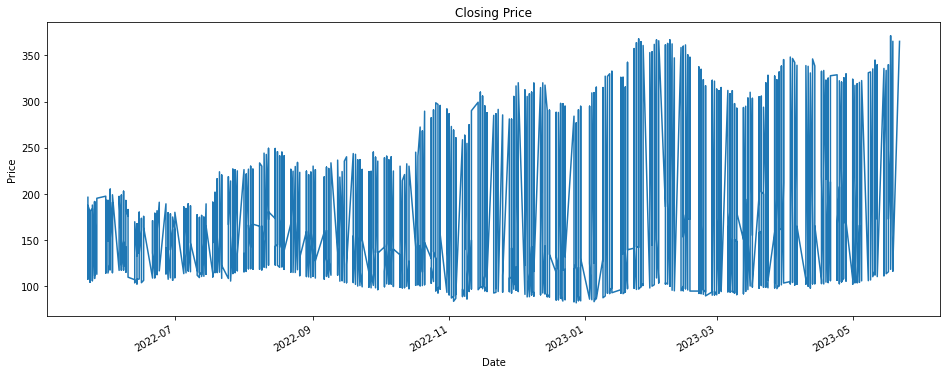

In [24]:
df['Close'].plot(figsize=(16, 6))
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

### Time-series Dot Plot

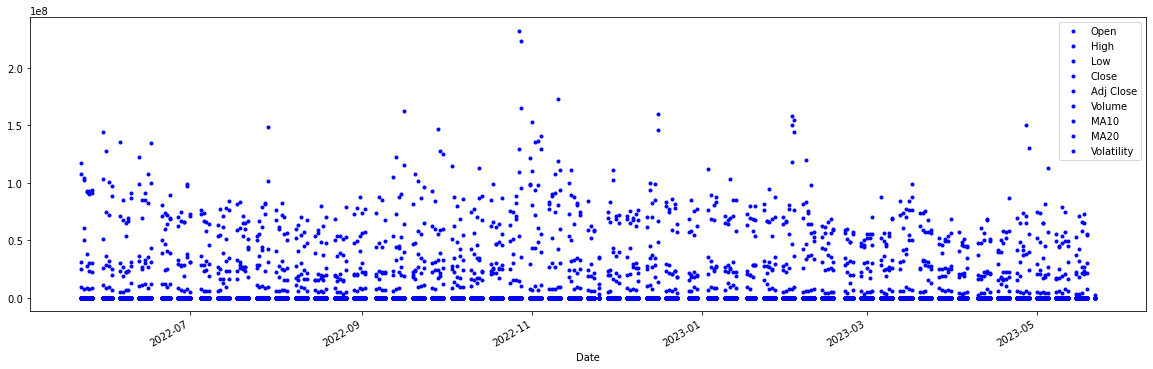

In [25]:
# Draw a dot plot using temp and .plot() method 
df.plot(figsize = (20,6), style = '.b');

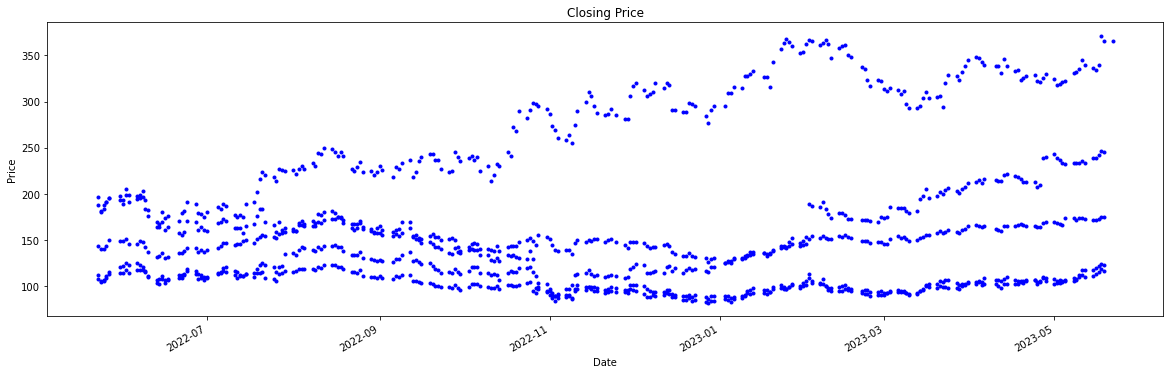

In [26]:
df['Close'].plot(figsize=(20, 6), style= '.b')
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

### Separated Annual Yearly Percentage Change

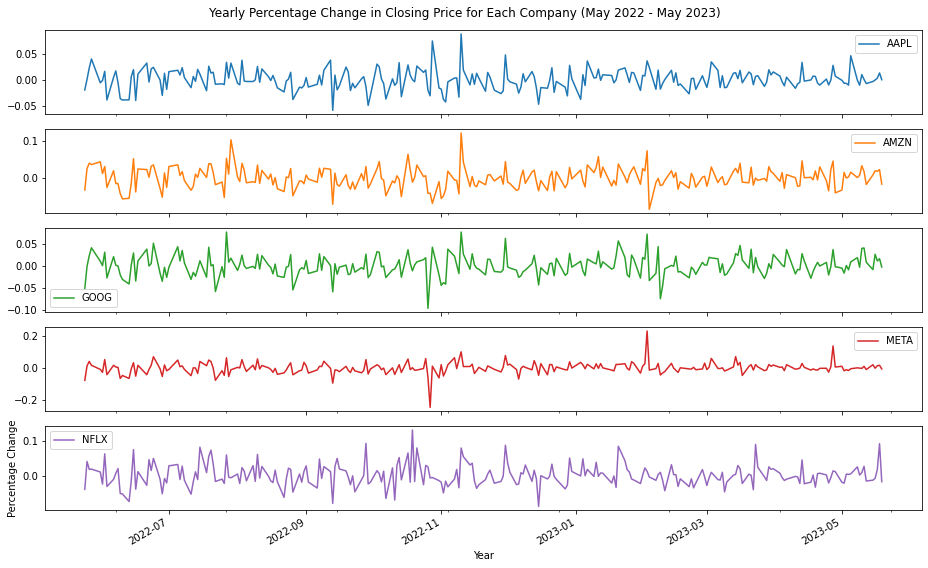

In [27]:
import pandas as pd

# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index.get_level_values('Date') >= start_date) & (df.index.get_level_values('Date') <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index.get_level_values('Date'))
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot the annual percentage changes as subplots
df_annual_pct_change.plot(figsize=(13, 8), subplots=True, legend=True)

# Set the plot title and labels
plt.suptitle('Yearly Percentage Change in Closing Price for Each Company (May 2022 - May 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show();

### All Annual Together

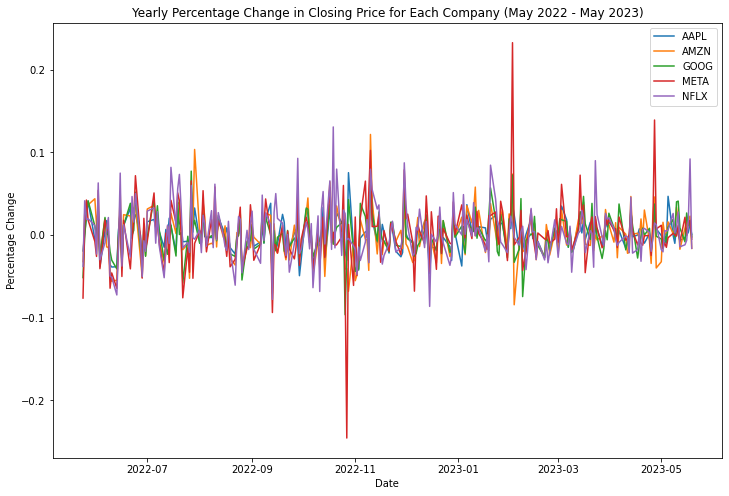

In [28]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot the annual percentage changes
plt.figure(figsize=(12, 8))
for column in df_annual_pct_change.columns:
    plt.plot(df_annual_pct_change.index.to_numpy(), df_annual_pct_change[column].values, label=column)

# Set the plot title and labels
plt.title('Yearly Percentage Change in Closing Price for Each Company (May 2022 - May 2023)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()

# Display the plot
plt.show();

### Showing Distributions 
- Check for normality
- Check on raw and transformed data

In [29]:
df

Ticker        Open        High         Low       Close   Adj Close   
Date                                                                            
2022-05-23   META  195.190002  196.990005  191.240005  196.229996  196.229996  \
2022-05-24   META  180.550003  183.679993  176.110001  181.279999  181.279999   
2022-05-25   META  180.399994  185.449997  179.320007  183.830002  183.830002   
2022-05-26   META  182.880005  192.830002  182.259995  191.630005  191.630005   
2022-05-27   META  191.360001  195.330002  189.800003  195.130005  195.130005   
...           ...         ...         ...         ...         ...         ...   
2023-05-15   GOOG  116.489998  118.794998  116.480003  116.959999  116.959999   
2023-05-16   GOOG  116.830002  121.199997  116.830002  120.089996  120.089996   
2023-05-17   GOOG  120.180000  122.279999  119.459999  121.480003  121.480003   
2023-05-18   GOOG  121.559998  123.900002  121.489998  123.519997  123.519997   
2023-05-19   GOOG  124.199997  126.478996  122.720001  123.250000  123.250000   

              Volume        MA10       MA20  Volatility  
Date                                                     
2022-05-23  25059200         NaN        NaN         NaN  
2022-05-24  50406300         NaN        NaN         NaN  
2022-05-25  28030200         NaN        NaN         NaN  
2022-05-26  23056500         NaN        NaN         NaN  
2022-05-27  22562700         NaN        NaN         NaN  
...              ...         ...        ...         ...  
2023-05-15  22107900  110.376500  108.29275    0.019817  
2023-05-16  32370100  111.787499  109.04125    0.018516  
2023-05-17  26659600  113.323499  109.86425    0.018093  
2023-05-18  27014500  115.154499  110.74525    0.016305  
2023-05-19  30251300  116.857999  111.61225    0.017240  

[1251 rows x 10 columns]

### Histogram

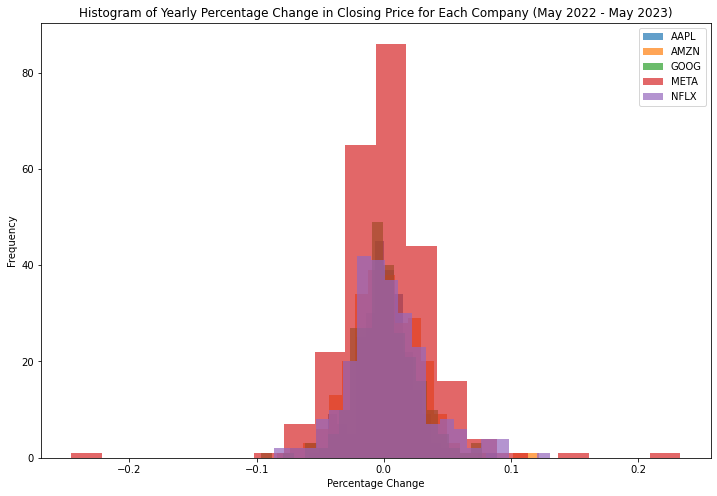

In [30]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot a histogram for each company
plt.figure(figsize=(12, 8))
for column in df_annual_pct_change.columns:
    plt.hist(df_annual_pct_change[column].dropna(), bins=20, alpha=0.7, label=column)

# Set the plot title and labels
plt.title('Histogram of Yearly Percentage Change in Closing Price for Each Company (May 2022 - May 2023)')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show();

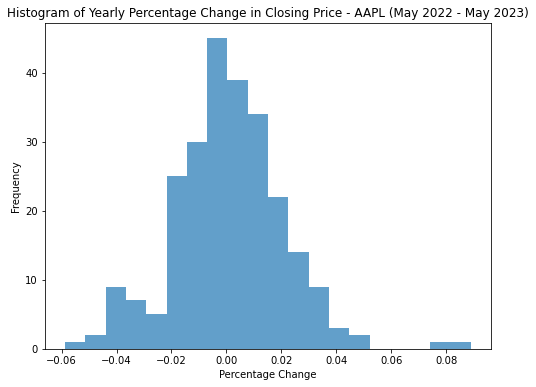

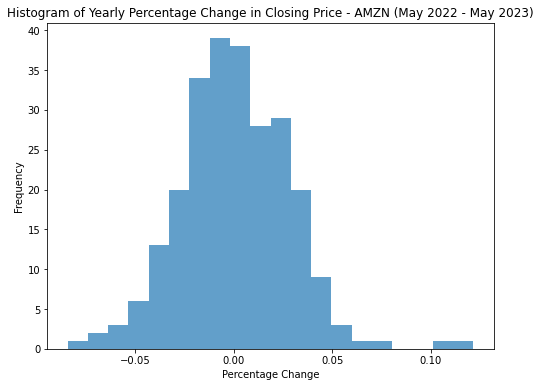

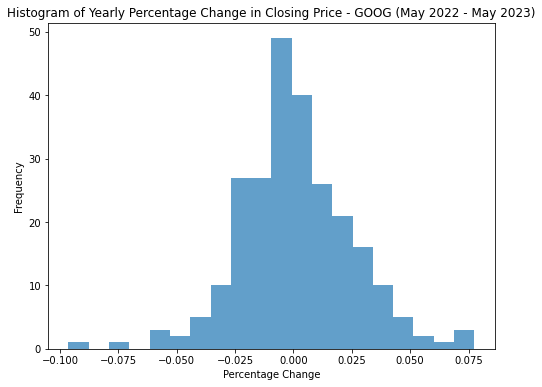

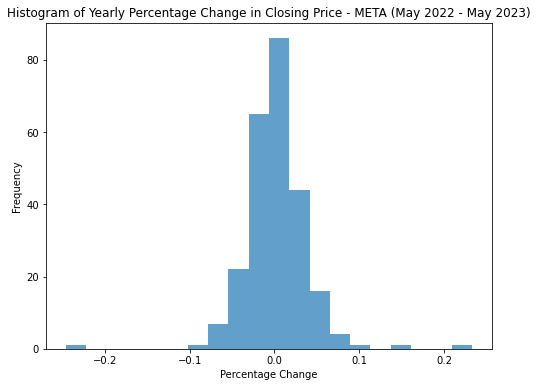

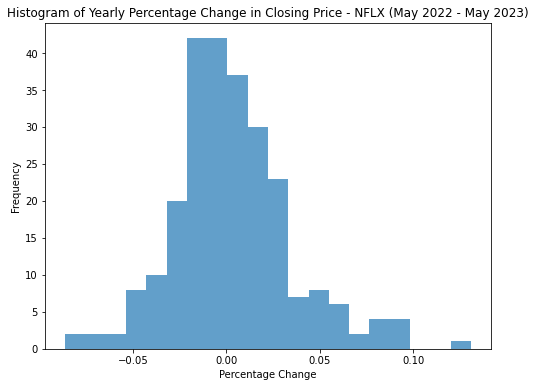

In [31]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Iterate over each group and create separate histograms
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)
    
    # Plot a histogram for the current company
    plt.figure(figsize=(8, 6))
    plt.hist(pct_change.dropna(), bins=20, alpha=0.7)
    
    # Set the plot title and labels
    plt.title(f'Histogram of Yearly Percentage Change in Closing Price - {ticker} (May 2022 - May 2023)')
    plt.xlabel('Percentage Change')
    plt.ylabel('Frequency')
    
    # Display the plot for the current company
    plt.show();

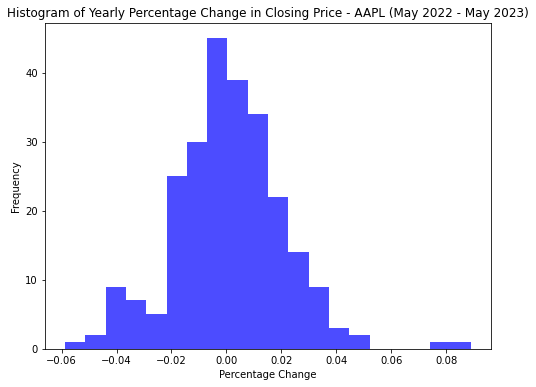

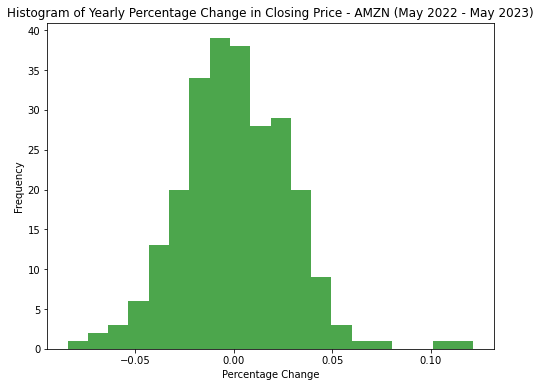

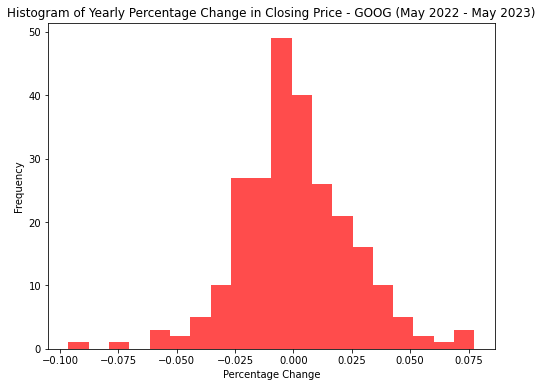

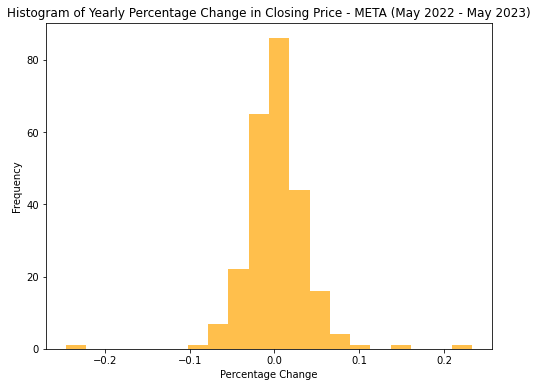

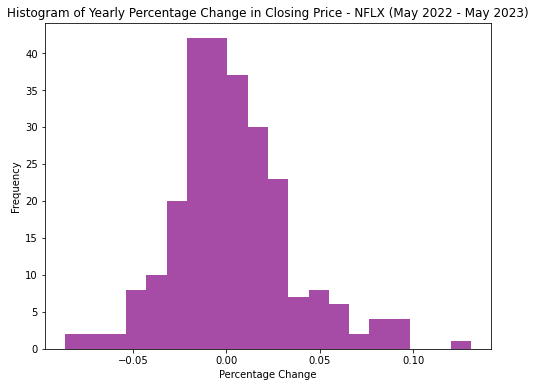

In [32]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Define a list of colors for each histogram
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Add more colors if needed

# Iterate over each group and create separate histograms
for i, (ticker, group) in enumerate(groups):
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)
    
    # Plot a histogram for the current company with the specified color
    plt.figure(figsize=(8, 6))
    plt.hist(pct_change.dropna(), bins=20, alpha=0.7, color=colors[i % len(colors)])
    
    # Set the plot title and labels
    plt.title(f'Histogram of Yearly Percentage Change in Closing Price - {ticker} (May 2022 - May 2023)')
    plt.xlabel('Percentage Change')
    plt.ylabel('Frequency')
    
    # Display the plot for the current company
    plt.show();

The histogram illustrates the distribution of yearly percentage changes in the closing prices of different companies' stocks within the specified time range (May 2022 - May 2023). Each histogram represents a specific company, identified by its ticker symbol. 

The x-axis of the histogram represents the range of percentage changes, while the y-axis represents the frequency or count of occurrences for each range. The histogram is divided into bins, where each bin represents a range of percentage changes. The height of each bar in the histogram indicates the number of instances falling within that range.

By analyzing the histogram, we can gain insights into the volatility and distribution of price changes for each company during the given period. A wider and more spread-out distribution suggests higher price volatility, while a narrower distribution indicates more stable price behavior. Additionally, we can identify any patterns or outliers in the data that might be worth investigating further.

In [37]:
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

### Density Plot 

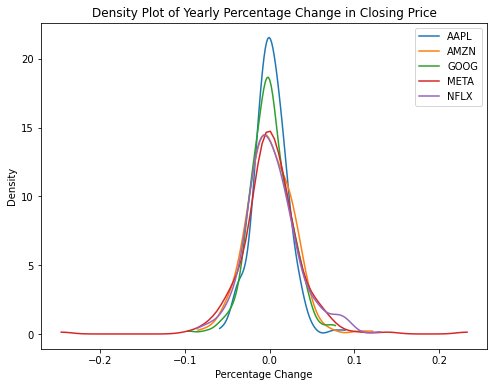

In [38]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over each group and create separate density plots
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)

    # Compute the kernel density estimate
    kde = gaussian_kde(pct_change.dropna())

    # Generate x-values for the density plot
    x = np.linspace(pct_change.min(), pct_change.max(), num=100)

    # Plot the density line for the current company
    ax.plot(x, kde(x), label=ticker)

# Set the plot title and labels
ax.set_title('Density Plot of Yearly Percentage Change in Closing Price')
ax.set_xlabel('Percentage Change')
ax.set_ylabel('Density')

# Add a legend
ax.legend()

# Display the plot
plt.show();

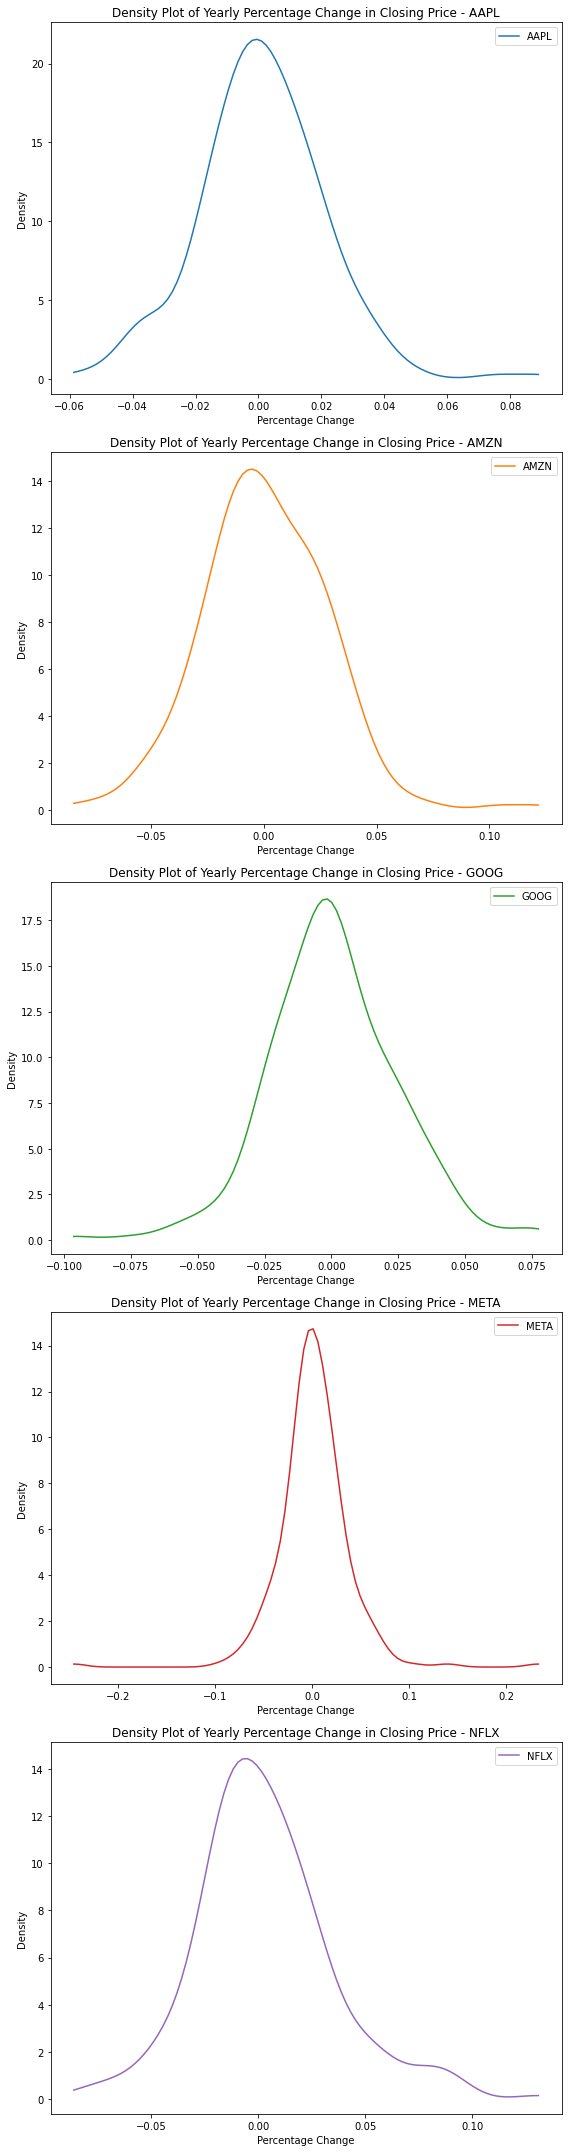

In [39]:
import numpy as np
from scipy.stats import gaussian_kde

start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

groups = df_filtered.groupby('Ticker')

# Determine the number of groups
num_groups = len(groups)

# Set up the figure and subplots
fig, axes = plt.subplots(num_groups, 1, figsize=(8, 6*num_groups))

# Iterate over each group and create separate density plots
for i, (ticker, group) in enumerate(groups):
    pct_change = group['Close'].pct_change()
    pct_change = pct_change.reindex(group.index)

    kde = gaussian_kde(pct_change.dropna())

    x = np.linspace(pct_change.min(), pct_change.max(), num=100)

    # Use a different color for each group
    color = plt.cm.tab10(i)

    # Plot the density line for the current company on its own subplot
    ax = axes[i] if num_groups > 1 else axes
    ax.plot(x, kde(x), color=color, label=ticker)

    # Set the subplot title and labels
    ax.set_title(f'Density Plot of Yearly Percentage Change in Closing Price - {ticker}')
    ax.set_xlabel('Percentage Change')
    ax.set_ylabel('Density')

    # Add a legend to each subplot
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show();

## Model

## Evaluation

## Results

## Conclusion

## Next Steps